#Introduzione
In questo notebook, confronteremo due algoritmi di ordinamento: l'**Insertion Sort** e il **Counting Sort**.

* L'**Insertion Sort** è un algoritmo di ordinamento che costruisce l'array ordinato un elemento alla volta. È efficiente per insiemi di dati di piccole dimensioni.La sua complessità temporale è $O(n^2)$ nel caso medio e peggiore, e $O(n)$ nel caso migliore in cui l'array sia già ordinato.La sua complessità spaziale è $O(1)$, in quanto ordina l'array "in-place" (quantità costante di spazio di memoria aggiuntivo).
* Il **Counting Sort** è un algoritmo di ordinamento non basato sui confronti. Opera contando il numero di occorrenze di ciascun elemento con una chiave univoca all'interno di un certo intervallo. La sua complessità temporale è lineare, $O(n+k)$, dove 'n' è il numero di elementi e 'k' è l'intervallo dei valori in input.Tuttavia, richiede più memoria, con una complessità spaziale di $O(k)$.

L'obiettivo di questo laboratorio è analizzare e confrontare le prestazioni di questi due algoritmi in termini di tempo di esecuzione e di memoria utilizzata, al variare della dimensione dell'input.

#Codice Insertion sort

In [39]:
def insertion_sort(arr):

    for j in range(1, len(arr)):
        key = arr[j]
        i = j - 1
        while i >= 0 and arr[i] > key:
            arr[i + 1] = arr[i]
            i -= 1
        arr[i + 1] = key
    return arr

#Codice Counting sort
Questo algoritmo è adatto per ordinare array di interi non negativi. Funziona creando un array ausiliario per contare le occorrenze di ogni elemento e poi utilizza questo conteggio per calcolare le posizioni finali degli elementi.

Un’importante proprietà del counting sort è la *stabilità*: i numeri con lo stesso valore si presentano nell’array di output nello stesso ordine in cui si trovano nell’array di input. La stabilità del counting sort è importante perché è cruciale per la correttezza di altri algoritmi come il radix sort.

In [40]:
def counting_sort(arr, k):

    n = len(arr)
    C = [0] * (k + 1)

    for i in range(k + 1):
        C[i] = 0

    for j in range(n):
        C[arr[j]] = C[arr[j]] + 1

    for i in range(1, k + 1):
        C[i] = C[i] + C[i - 1]

    B = [0] * n

    for j in range(n - 1, -1, -1):
        B[C[arr[j]] - 1] = arr[j]
        C[arr[j]] = C[arr[j]] - 1

    return B

#Creazione casuale di array e misurazione tempo di esecuzione
Per confrontare le prestazioni dei due algoritmi, genereremo array di numeri interi casuali di dimensioni crescenti. Utilizzeremo il modulo `timeit` di Python per misurare con precisione il tempo di esecuzione di ciascun algoritmo su questi array.

In [75]:
import timeit
import random

def time_insertion_sort(arr):
    insertion_sort(arr.copy())

def time_counting_sort(arr, k):
    counting_sort(arr.copy(), k)

# Parametri per la generazione degli array
sizes = [10, 50, 100, 200, 500, 1000, 2000, 5000]
max_value = 1000  # Valore massimo per gli interi casuali (questo è il nostro k)

times_insertion = []
times_counting = []

print("Confronto Tempi di Esecuzione: Insertion Sort vs Counting Sort")
print("=" * 60)

# Ciclo per misurare i tempi di esecuzione
for size in sizes:
    # Creazione dell'array casuale
    random_array = [random.randint(0, max_value) for _ in range(size)]

    # Misurazione tempo per Insertion Sort
    t_insertion = timeit.timeit(lambda: time_insertion_sort(random_array), number=10)
    times_insertion.append(t_insertion)

    # Misurazione tempo per Counting Sort (passiamo anche k=max_value)
    t_counting = timeit.timeit(lambda: time_counting_sort(random_array, max_value), number=10)
    times_counting.append(t_counting)

    print(f"Dimensione Array: {size}")
    print(f"  Tempo Insertion Sort: {t_insertion:.6f} secondi")
    print(f"  Tempo Counting Sort:  {t_counting:.6f} secondi")
    print(f"  Miglioramento: {t_insertion/t_counting:.2f}%")
    print("-" * 40)

Confronto Tempi di Esecuzione: Insertion Sort vs Counting Sort
Dimensione Array: 10
  Tempo Insertion Sort: 0.000034 secondi
  Tempo Counting Sort:  0.001393 secondi
  Miglioramento: 0.02%
----------------------------------------
Dimensione Array: 50
  Tempo Insertion Sort: 0.000468 secondi
  Tempo Counting Sort:  0.001048 secondi
  Miglioramento: 0.45%
----------------------------------------
Dimensione Array: 100
  Tempo Insertion Sort: 0.001798 secondi
  Tempo Counting Sort:  0.001366 secondi
  Miglioramento: 1.32%
----------------------------------------
Dimensione Array: 200
  Tempo Insertion Sort: 0.007704 secondi
  Tempo Counting Sort:  0.001335 secondi
  Miglioramento: 5.77%
----------------------------------------
Dimensione Array: 500
  Tempo Insertion Sort: 0.045954 secondi
  Tempo Counting Sort:  0.001877 secondi
  Miglioramento: 24.48%
----------------------------------------
Dimensione Array: 1000
  Tempo Insertion Sort: 0.193380 secondi
  Tempo Counting Sort:  0.003045 s

#Rappresentazione grafica tempo di esecuzione 🕑
Una rappresentazione grafica è il modo più efficace per visualizzare e confrontare le performance. Utilizzeremo la libreria `matplotlib` per creare un grafico che metta in relazione la dimensione dell'array (sull'asse X) con il tempo di esecuzione (sull'asse Y) per entrambi gli algoritmi.

/tmp/ipython-input-1264496235.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(sizes, times_insertion, 'b-o', linestyle='-', label='Insertion Sort')
/tmp/ipython-input-1264496235.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-s" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(sizes, times_counting, 'r-s', linestyle='-', label='Counting Sort')


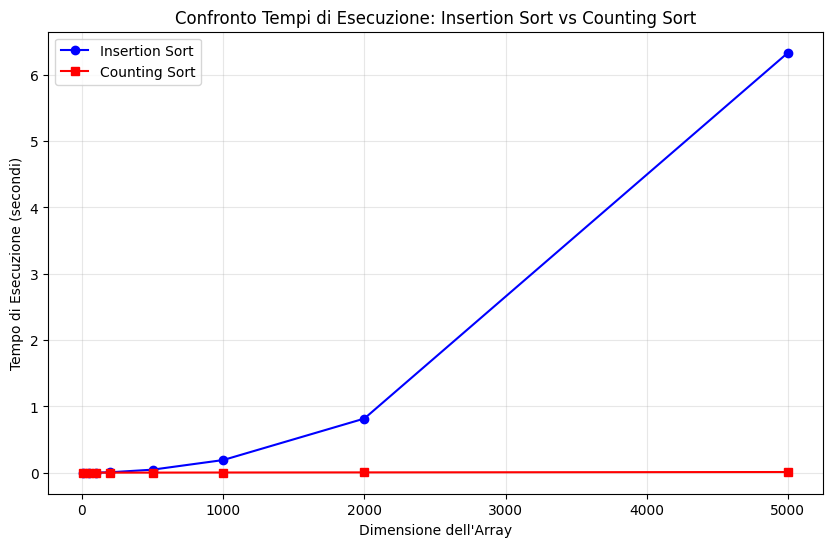

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sizes, times_insertion, 'b-o', linestyle='-', label='Insertion Sort')
plt.plot(sizes, times_counting, 'r-s', linestyle='-', label='Counting Sort')

plt.xlabel("Dimensione dell'Array")
plt.ylabel("Tempo di Esecuzione (secondi)")
plt.title("Confronto Tempi di Esecuzione: Insertion Sort vs Counting Sort")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Confronto per Memoria Utilizzata
Come menzionato, il Counting Sort ha una complessità temporale lineare, che lo rende molto veloce. Tuttavia, questo vantaggio ha un costo in termini di memoria. La sua complessità spaziale dipende dal valore massimo (k) presente nell'array, il che può portare a un consumo di memoria significativo se i valori sono molto grandi.\
Per analizzare l'utilizzo della memoria, possiamo usare il pacchetto `tracemalloc`. Questa libreria Python permette di tracciare l'allocazione di memoria durante l'esecuzione.\
La funzione `measure_memory_usage` prende in ingresso due paramentri: `func`, la funzione che vogliamo misurare (come ad esempio `insertion_sort` o `counting_sort`), mentre `*args` saranno gli argomenti da passare a `func`.




In [62]:
def measure_memory_usage(func, *args):
    tracemalloc.start()

    # Esegui la funzione
    func(*args)

    # Ottieni statistiche memoria
    _,peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return peak

Adesso andreamo a fare due esperimenti distinti per dimostrare come la complessità spaziale influisce sull'uso reale della memoria. Per prima cosa vado a fare il setup iniziale con il valori di n (`sizes`) e k (`k_values`), per vedere come scala la memoria al variare della grandezza dell'array e al variare del valore massimo nell'array.

In [63]:
sizes = [100, 500, 1000, 2000, 5000]
k_values = [100, 500, 1000, 2000, 5000]

#TEST 1: Memoria vs Dimensione Array (k fisso)
In questo test l'obiettivo è quello di dimostrare che quando **k** è **costante**:
* **Insertion Sort**: memoria rimane $O(1)$ (costante)
* **Counting Sort**: memoria cresce $O(n)$ (linearmente con la dimensione)

In [64]:
print("\n1. MEMORIA vs DIMENSIONE ARRAY (k = 1000)")
print("-" * 50)

k_fixed = 1000
memory_insertion_vs_n = []
memory_counting_vs_n = []

for size in sizes:
    # Crea array di test
    test_array = [random.randint(0, k_fixed) for _ in range(size)]

    # Misura memoria Insertion Sort
    mem_insertion = measure_memory_usage(insertion_sort, test_array.copy())
    memory_insertion_vs_n.append(mem_insertion / 1024)  # Convert to KB

    # Misura memoria Counting Sort
    mem_counting = measure_memory_usage(counting_sort, test_array.copy(), k_fixed)
    memory_counting_vs_n.append(mem_counting / 1024)  # Convert to KB

    print(f"n={size:4d} | Insertion: {mem_insertion/1024:8.2f} KB | Counting: {mem_counting/1024:8.2f} KB | Rapporto: {mem_counting/mem_insertion:.1f}x")


1. MEMORIA vs DIMENSIONE ARRAY (k = 1000)
--------------------------------------------------
n= 100 | Insertion:     0.09 KB | Counting:     8.73 KB | Rapporto: 93.1x
n= 500 | Insertion:     0.15 KB | Counting:    26.63 KB | Rapporto: 174.8x
n=1000 | Insertion:     4.16 KB | Counting:    39.79 KB | Rapporto: 9.6x
n=2000 | Insertion:     4.24 KB | Counting:    51.04 KB | Rapporto: 12.0x
n=5000 | Insertion:     4.24 KB | Counting:    76.72 KB | Rapporto: 18.1x


#TEST 2: Memoria vs Valore k (n fisso)
In questo test l'obiettivo è quello di dimostrare che quando **n** è **costante**:
* Insertion Sort: memoria rimane $O(1)$ (non dipende da k)
* Counting Sort: memoria cresce $O(k)$ (linearmente con il range)

In [65]:
print(f"\n2. MEMORIA vs VALORE K (n = 1000)")
print("-" * 50)

n_fixed = 1000
memory_insertion_vs_k = []
memory_counting_vs_k = []

for k in k_values:
    # Crea array di test
    test_array = [random.randint(0, k) for _ in range(n_fixed)]

    # Misura memoria Insertion Sort (dovrebbe rimanere costante)
    mem_insertion = measure_memory_usage(insertion_sort, test_array.copy())
    memory_insertion_vs_k.append(mem_insertion / 1024)

    # Misura memoria Counting Sort (dovrebbe crescere con k)
    mem_counting = measure_memory_usage(counting_sort, test_array.copy(), k)
    memory_counting_vs_k.append(mem_counting / 1024)

    print(f"k={k:4d} | Insertion: {mem_insertion/1024:8.2f} KB | Counting: {mem_counting/1024:8.2f} KB | Rapporto: {mem_counting/mem_insertion:.1f}x")


2. MEMORIA vs VALORE K (n = 1000)
--------------------------------------------------
k= 100 | Insertion:     5.05 KB | Counting:    11.16 KB | Rapporto: 2.2x
k= 500 | Insertion:     4.24 KB | Counting:    23.60 KB | Rapporto: 5.6x
k=1000 | Insertion:     4.19 KB | Counting:    39.63 KB | Rapporto: 9.5x
k=2000 | Insertion:     4.19 KB | Counting:    70.79 KB | Rapporto: 16.9x
k=5000 | Insertion:     4.19 KB | Counting:   164.32 KB | Rapporto: 39.2x


#Rappresentazione grafica memoria utilizzata 🧠
Come per il tempo di utilizzo, utilizziamo anche qua dei grafici per visualizzare e confrontare le performance dei due test. Analogamente useremo la libreria `matplotlib` per creare la rappresentazione grafica che metta in relazione l'utilizzo della memoria in base alla dimensione dell'array e al variare di k.

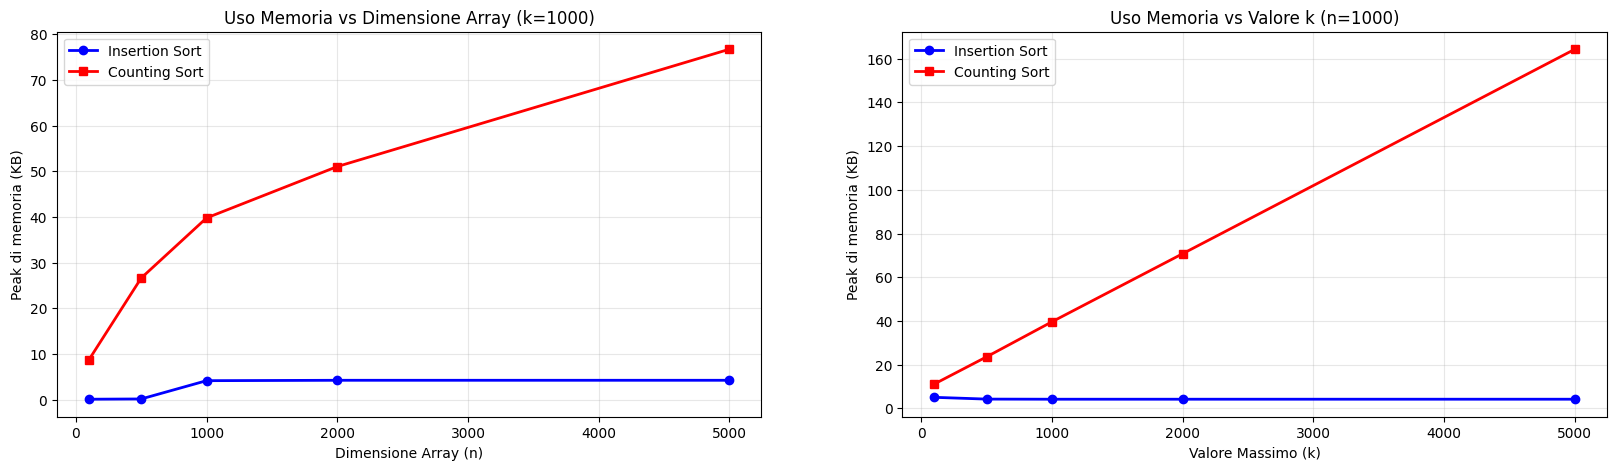

In [73]:
# Visualizzazione grafici
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 5))

# Grafico 1: Memoria vs dimensione array
ax1.plot(sizes, memory_insertion_vs_n, 'b-o', label='Insertion Sort', linewidth=2)
ax1.plot(sizes, memory_counting_vs_n, 'r-s', label='Counting Sort', linewidth=2)
ax1.set_xlabel('Dimensione Array (n)')
ax1.set_ylabel('Peak di memoria (KB)')
ax1.set_title('Uso Memoria vs Dimensione Array (k=1000)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Grafico 2: Memoria vs valore k
ax2.plot(k_values, memory_insertion_vs_k, 'b-o', label='Insertion Sort', linewidth=2)
ax2.plot(k_values, memory_counting_vs_k, 'r-s', label='Counting Sort', linewidth=2)
ax2.set_xlabel('Valore Massimo (k)')
ax2.set_ylabel('Peak di memoria (KB)')
ax2.set_title('Uso Memoria vs Valore k (n=1000)')
ax2.legend()
ax2.grid(True, alpha=0.3)

#Conclusioni
Analizzando i risultati ottenuti, possiamo trarre le seguenti conclusioni:
* **Tempo di Esecuzione**: Il grafico dei tempi di esecuzione mostra chiaramente che il Counting Sort è significativamente più veloce dell'Insertion Sort, specialmente all'aumentare della dimensione dell'array. La curva dell'Insertion Sort cresce in modo quadratico, mentre quella del Counting Sort rimane molto più piatta, confermando la sua complessità temporale lineare.
* **Utilizzo della Memoria**: L'analisi con `tracemalloc` evidenzia il principale svantaggio del Counting Sort. Mentre l'Insertion Sort opera "in-place" e il suo consumo di memoria è minimo e costante. Poiché il Counting Sort alloca un array ausiliario la cui dimensione è proporzionale al valore massimo nell'input, porta di conseguenza ad un consumo di memoria molto elevato e impraticabile se l'intervallo dei valori (k) è grande (come si può notare nei grafici dei due test).

In sintesi, la scelta tra i due algoritmi dipende dalle caratteristiche dei dati:
* **Insertion Sort** è una buona scelta per insiemi di dati piccoli o quasi ordinati, dove la sua semplicità e il basso consumo di memoria sono vantaggiosi.
* **Counting Sort** è estremamente efficiente per ordinare grandi array di interi con un intervallo di valori relativamente piccolo, dove la sua velocità lineare supera di gran lunga il costo della memoria aggiuntiva.